# 3.1. Введение в свёртки
https://vod-progressive.akamaized.net/exp=1645786467~acl=%2Fvimeo-prod-skyfire-std-us%2F01%2F4042%2F12%2F320214599%2F1241627675.mp4~hmac=ccf038689fdf2d44ae46862edb4ec20b6a180e63ce5379f375e56ca34d93b25c/vimeo-prod-skyfire-std-us/01/4042/12/320214599/1241627675.mp4

В этом модуле мы поговорим про свёрточные сети.

Задачи, которые мы научимся решать:

задачи классификации (например, понять какой объект изображён на картинке);
задачи регрессии (например, определить возраст человека на картинке).
Итак, приступим.

Как компьютер воспринимает картинку?  
Любая картинка состоит из пикселей, а в каждом пикселе закодирована яркость — это число от 0 до 255. Яркость 0 означает чёрный цвет, а значение 255 — белый. 

Для примера возьмём картинку и очень сильно её увеличим. После этого станут отчётливо видны пиксели, которые имеют различные яркости.
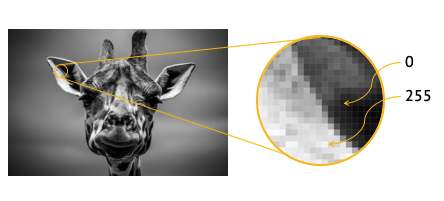
В данном случае у нас чёрно-белая картинка, и пиксели выглядят чёрными, белыми и серыми. При работе с цветными изображениями всё становится несколько сложнее, потому что яркость будет определена для каждого из трёх цветовых каналов RGB (красного, синего, зелёного).

# 3.2. Как применять нейросеть
https://vod-progressive.akamaized.net/exp=1645786633~acl=%2Fvimeo-prod-skyfire-std-us%2F01%2F4042%2F12%2F320214765%2F1241587986.mp4~hmac=ec5d65cfe41d3deceeecd3679b37892d24aec3f847816cd7fb2f0aaf276301ba/vimeo-prod-skyfire-std-us/01/4042/12/320214765/1241587986.mp4

Как применять нейросеть к картинке?
Давайте применим уже знакомый нам многослойный перцептрон. Пусть на вход у нас поступают пиксели картинки, которые образуют собой двумерную матрицу. Сопоставим каждой ячейке нашей пиксельной матрицы определённый вес, зависящий от яркости, а затем сложим все наши элементы матрицы с этими весами и проведём через сигмоиду, как мы это обычно делаем в простом нейроне.
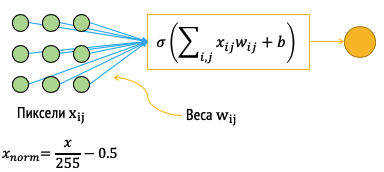
При таком подходе могут возникнуть проблемы:

Картинка может быть очень большого размера. Допустим, если картинка имеет размеры 300 x 300, то нам нужно 90 000 весов (а это очень много).
Допустим, мы хотим определять, изображён ли на картинке котик.
Возьмём картинку, на которой котик изображён в правом нижнем углу. Во время градиентного спуска немного изменятся веса, которые смотрят непосредственно на этого котика (на этой картинке — красные веса).
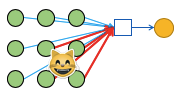
Но если мы возьмём другую картинку, на которой котик будет находиться в левом верхнем углу, то у нас при градиентном спуске немного изменятся зелёные веса, потому что котик будет находиться в другой части картинки.
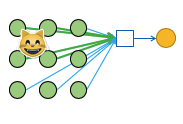
Таким образом, котик в разных частях картинки приводит к обновлению различных весов, хотя эти веса должны научиться находить на картинке одно и то же животное. То есть, если бы у нас была выборка картинок только с котиками в правом нижнем углу, мы бы никогда не научились находить котиков на картинках, на которых они расположены в левом верхнем углу.

# 3.3. Операция свёртки
https://vod-progressive.akamaized.net/exp=1645786689~acl=%2Fvimeo-prod-skyfire-std-us%2F01%2F4043%2F12%2F320216279%2F1241595403.mp4~hmac=226b5b61a9ef2ebb2e680c88dbfd38540904036999dda6f9c68282c10c375ab4/vimeo-prod-skyfire-std-us/01/4043/12/320216279/1241595403.mp4

Получается, что рассмотренный способ нам не подходит. Как же быть?

К счастью, для такого рода анализа изображений существует операция свёртки.

Как работает операция свёртки?  
Пусть на вход подаётся изображение, которое состоит из 0 и 1 (так нам будет удобнее устно считать и понимать, как именно работает свёртка), и пусть имеется скользящее окно фиксированного размера (в нашем случае 2 × 2). Нашим окошком 2 × 2 мы пробегаем по изображению и каждый кусочек, по которому пробегает окошко, поэлементно умножаем на некоторые веса и складываем. То есть получаем скалярное произведение нашего кусочка изображения и фильтра, состоящего из весов, которые мы будем обучать.

На картинке ниже представлен первый шаг, результат выполнения скалярного произведения кусочка изображения на фильтр — число 5.
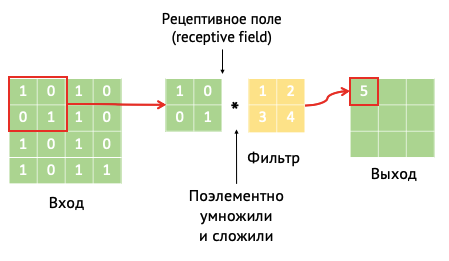
Будем постепенно передвигать окошко и получать некие выходные данные. На картинке ниже показан один из шагов вычислений:
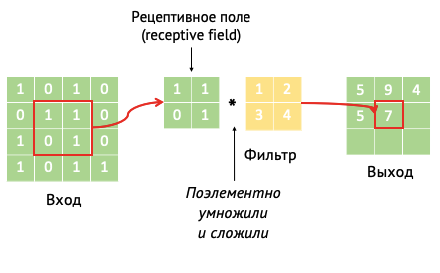
На самом деле, про свёртки известно очень давно. В любом редакторе, например, в Photoshop, есть реализации свёрток.

Пример № 1  
Пусть на вход подаётся картинка. Она пропускается через фильтр 3 × 3, у которого по центру стоит число 8, а во всех остальных ячейках –1 (сумма элементов равна 0).

Если этому фильтру подать на вход изображение, которое является однотонной заливкой, то, поэлементно умножив все яркости на коэффициенты и сложив, мы получим 0, который соответствует чёрному цвету. Те места, где заливка неоднотонная (есть перепад яркости), будут восприниматься как граница, и значение в этих ячейках будет отлично от 0. 

В результате свёртки получаем картинку с подсвеченными краями.

Пример № 2  
Рассмотрим другой фильтр, сумма весов которого равна 1. При однотонной заливке этот фильтр не будет менять цвет. Если заливка не будет однотонной, то на границе объекта на изображении у нас будет повышаться яркость. Визуально это будет восприниматься как увеличение резкости. Существует фильтр и для обратной операции — размытия. Такой фильтр состоит из одинаковых элементов и усредняет все цвета, которые видит.

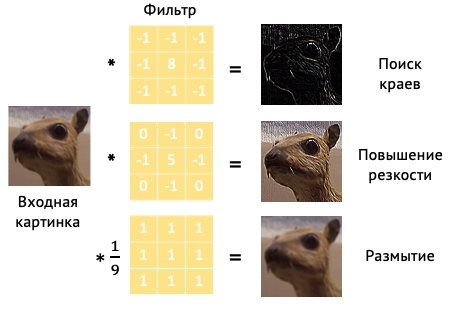


# 3.4. Простой свёрточный слой
https://vod-progressive.akamaized.net/exp=1645786766~acl=%2Fvimeo-prod-skyfire-std-us%2F01%2F4152%2F12%2F320763679%2F1244422253.mp4~hmac=8dad2935815e50f80e42bfd097a5ea7fe9918aac20019f7bf6880c6f730bc6d0/vimeo-prod-skyfire-std-us/01/4152/12/320763679/1244422253.mp4

Как реализовать простой свёрточный слой в нейросети?
Для начала нужно разобраться, как это поможет нам искать на картинках определённые объекты (кошек, собак, уток).

Рассмотрим пример. Пусть на картинке у нас расположена чёрточка под углом, и нам нужно научиться находить её на картинке. Тогда возьмём в качестве фильтра эту же чёрточку.
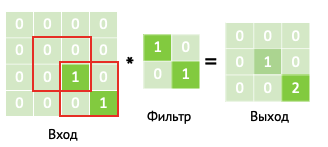
Заметим, что после применения операции ненулевые значения на выходе будут только для двух положений скользящего окна (положения обозначены красной рамкой).

Посмотрим, как будет работать свёртка с картинкой, на которой чёрточка повёрнута в другую сторону. Применив операцию свёртки, получим немного другие значения: здесь тоже только два ненулевых значения на выходе, но они меньше, чем в прошлый раз.
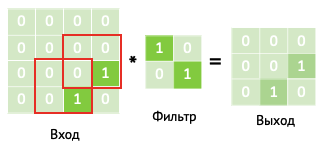
Это говорит нам о том, что на самом деле мы научились определять, что чёрточка на картинке повёрнута.

Как же теперь нам понять, куда именно повернута чёрточка? 
Нужно просто взять максимум функции — именно он и будет определять поворот нашей чёрточки.
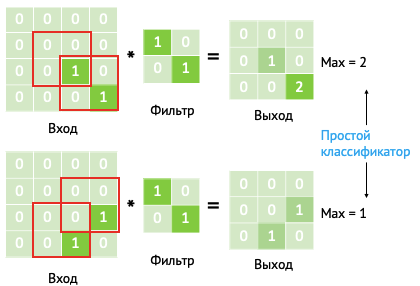
Максимум функции — простой классификатор для изображений.

Данный классификатор обладает некоторыми полезными свойствами. Например, свёртка и сдвиг коммутативны (если эти операции поменять местами, то результат не изменится).

Посмотрим на примере, что произойдет на выходе, если чёрточка на изображении переместится в другой угол.
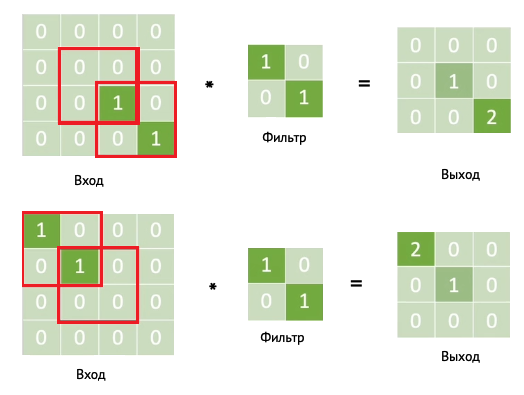
Снова получим для обоих случаев лишь два ненулевых положения окна. Причём для обоих случаев результат одинаков (только сдвинут). Это означает, что неважно, что делать вначале, сдвиг или свёртку — результат всё равно будет одинаков.

Это важный и полезный результат, так как наш классификатор — максимум одинаков. То есть неважно, где будет расположен котик на картинке (в левом верхнем или в правом нижнем углу), мы всё равно будем знать, что это котик.

Теперь мы можем собрать свёрточный слой в нейросети.

Как это работает?
На вход подаётся зелёная картинка 3 × 3 с некой рамкой по бокам (обычно она заполнена нулями), называемой padding, или добавкой, необходимой для того, чтобы мы смогли поместить столько окошек, какого размера картинка, чтобы картинка осталась такого же размера за счёт этой добавки.

У нас есть веса, которые нейросеть будет обучать с помощью градиентного спуска. На картинке ниже показано, как будет посчитан первый нейрон.
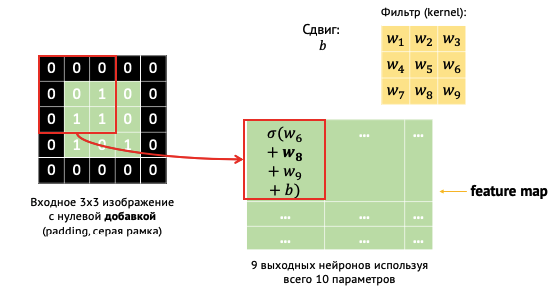
Кроме того, у нас есть ещё один параметр —  шаг (сдвиг, stride), с которым двигается наше скользящее окно. Здесь шаг — 1 пиксель.
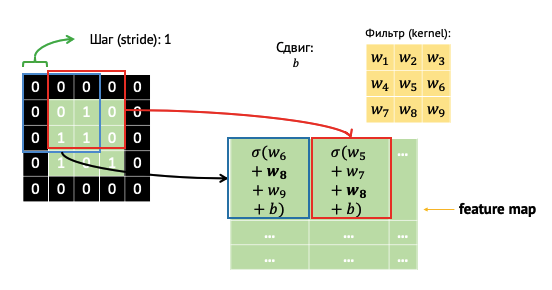
Продолжаем так дальше и на выходе получаем также картинку 3 × 3 — результат свёртки, называемый feature map (карта фичей).

Заметим, что для этого преобразования мы использовали всего 10 параметров (9 весов и 1 шаг).

Как работает градиентный спуск для операции свёртки?
На самом деле свёрточный слой — частный случай полносвязного. Веса, находящиеся вне нашего поля обзора, просто занулены. И тогда имеем полносвязный слой, а для полносвязного слоя мы уже умеем считать производную.

Как считать производную для свёрточного слоя?
Возьмём картинку 3 × 3 и фильтр 2 × 2. На этой картинке есть всего четыре возможных положения фильтра. Последим за одним параметром w4. Нам интересно взять производную нашей функции потерь именно по этому параметру. Все использования нашего параметра в сети назовём различными буквами (a, b, c, d) и будем считать по ним производную.

Чтобы сделать шаг по градиенту, необходимо будет посчитать производную потери по каждой из этих букв. Сдвинем каждый параметр по направлению антиградиента, но если вспомнить что a, b, c, d — это не разные параметры, а один и тот же, то становится понятно, как на самом деле работает градиентный спуск для свёртки: мы четыре раза обновили один и тот же параметр и обновили его на сумму градиентов по всем использованиям на нашей картинке.
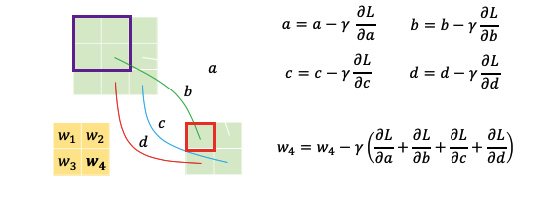
Ещё одним плюсом свёрточного слоя является то, что для его реализации нужно очень мало параметров. Пусть у нас имеется картинка 300 × 300, и на выходе мы хотим получить картинку такого же размера. В случае с полносвязным слоем нам необходимо 8.1 * 109 параметров, в то время как в случае со свёрточным слоем и окном 5 × 5 — всего 25 параметров.

# 3.5. Практика. Простой свёрточный слой
https://vod-progressive.akamaized.net/exp=1645786857~acl=%2Fvimeo-prod-skyfire-std-us%2F01%2F4088%2F12%2F320443866%2F1242675357.mp4~hmac=07ce775b60d1bf9e7e31c4f7387de79f741c4489b9a260669dfc577ec73e3121/vimeo-prod-skyfire-std-us/01/4088/12/320443866/1242675357.mp4

Используемый в видео ноутбук. https://colab.research.google.com/drive/1Wteyx4m3mbwnzkXBFnLRQo7Fwmc_Kl51

В данной практике мы посмотрим, как в Keras настроить свёрточную сеть, а точнее — как добавить свёрточный слой в нашу сеть. Мы будем использовать уже известную нам задачу Fashion MNIST. 

Загрузим необходимые данные и будем собирать свёрточную сеть, добавляя в неё свёрточный слой Conv2D. Изучим параметры слоя и установим необходимые:

```model.add(L.Conv2D(1, kernel_size=3, strides=1, padding='same', input_shape=(28, 28, 1)))```

# 3.6. Усложняем свёрточный слой
https://vod-progressive.akamaized.net/exp=1645786897~acl=%2Fvimeo-prod-skyfire-std-us%2F01%2F4152%2F12%2F320764192%2F1244429464.mp4~hmac=99424b010be11e28b678a3942a81ef941d34d96a4ea2aa43f87e32743d83af2d/vimeo-prod-skyfire-std-us/01/4152/12/320764192/1244429464.mp4

Теперь мы готовы усложнить свёрточный слой и применить его к какой-нибудь цветной картинке.

Картинку будем описывать тензором размера W х H х Сin , где Сin  — количество входных каналов (три канала RGB).

Для операции свёртки будем теперь «вырезать» не квадратик, как раньше, а кубик, чтобы отличать, например, рыжих котов от чёрных. Фильтр теперь тоже тензор, и его глубина также равна Сin. 

Независимо от того, какой размерности у нас картинка и фильтр, на выходе всё равно будет скаляр, так как мы берём входной кусочек объёма и объёмный фильтр, перемножаем и складываем, получая скаляр. То есть, применив свёртку к картинке, получим плоскую картинку.

Мы потеряли достаточно много информации, ведь на вход подавалась трёхмерная картинка, а на выходе получилась двумерная.  Тут-то и становится понятно, что одного фильтра мало.

Как решить эту проблему?  
Мы можем обучить много разных фильтров, все их применить, а результирующие картинки соединить в одну объёмную картинку на выходе. Каждый разрез этой объёмной выходной картинки будет хранить некую карту фичей, которую мы насчитаем.

Допустим, зелёный фильтр на картинке будет определять пиксели на горизонтальной границе, то есть всегда, когда мы будем на горизонтальной границе изображения, этот нейрон будет принимать какое-то большое значение.

Красный же фильтр научим определять пиксели на границе объекта по диагонали. И теперь в одном пикселе входного изображения появляется целый вектор признаков, которые мы можем использовать для дальнейшего анализа. Этих признаков мы можем сделать сколько угодно. Это наш гиперпараметр Сout  — количество выходных каналов в нашем объёме. Очевидно, что Сout  > 1, а на практике может быть такое значение как 32 или 64.
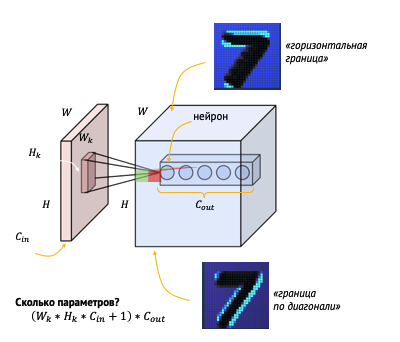
Теперь у пикселя появляется глубина, и мы переходим в новые координаты. Исходные координаты RGB были неудобны, так как в них ничего непонятно было о картинке, а теперь мы можем перейти, например, в 32 признака, каждый из которых решает свою определённую подзадачу. Мы сможем понять, на какой части картинки мы изображены: на горизонтальной или на диагональной. 

Следующие фильтры, которые будут применяться, смогут учитывать все эти признаки одновременно и научатся решать более сложную задачу.

Вновь подчеркнём, как мало параметров мы использовали. Если наш фильтр имеет размеры Wk х Hk х Сin , то для того чтобы научить Сout таких фильтров, необходимо всего лишь ( Wk * Hk * Сin + 1 ) * Сout параметров.

Да, и одного свёрточного слоя мало!  
Допустим, на картинке 300 × 300 изображён кот, а наш первый свёрточный слой посмотрел на кусочки изображения 3 × 3. Эти кусочки слишком маленькие, мы не можем из них собрать кота.

Давайте посмотрим. что произойдёт с нашей картинкой и преобразованиями в нейросети, когда мы к первому результату нашей свёртки применим ещё один свёрточный слой.

На примере ниже — вход размера 5 × 5. Мы применили свёртку размера 3 × 3 и получили девять различных значений. Заметьте, что на первом свёрточном слое каждый нейрон (например, зелёный, выделенный на картинке) смотрит на кусочек изображения размером 3 × 3. Но если к результату первого свёрточного слоя ещё раз применить свёртку с какими-то другими значениями в фильтре того же размера 3 × 3, то любой нейрон на выходе второго слоя свёртки уже смотрит эффективно на кусочек картинки размером 5 × 5, так как все нейроны, с которыми слой работает, смотрят на целый кусочек размера 3 × 3. Если провести пунктирные линии, то видно, что у нашего нейрона «повысилось поле обзора», и он смотрит на больший кусочек изображения. То есть, создавая больше слоёв, мы имеем возможность определить котика всё большего и большего размера.
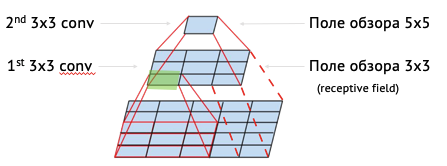
Что делать, если у нас котик занимает весь размер картинки (300 × 300)?
Посчитаем, сколько нам потребуется слоёв, чтобы распознать такого котика.

Рассмотрим это на простом одномерном примере. Допустим, у нас на входе одномерный вектор из девяти нейронов. Посмотрим, как будет выглядеть результат первой свёртки размером 3 × 1. 
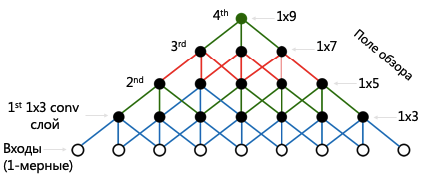
Каждый нейрон на первом свёрточном слое смотрит на три нейрона нашего изображения. Если мы применим ещё один свёрточный слой, то нейроны второго слоя будут смотреть уже на пять пикселей нашего изображения. Если так продолжать делать, то можно вывести формулу. Видно, что наше поле обзора прирастает линейно по количеству слоёв. Значит, чтобы посмотреть на котика размером 300 × 300, нам понадобится 150 слоёв, а это очень много. Возникает проблема, потому что столько слоёв будут очень долго просчитываться. Чуть позже мы научимся её решать.

# 3.7. Практика. Усложняем свёрточный слой
https://vod-progressive.akamaized.net/exp=1645786998~acl=%2Fvimeo-prod-skyfire-std-us%2F01%2F4088%2F12%2F320443804%2F1242674947.mp4~hmac=a817b851c251bb13ca786578493b8315424e225e617151650641bcf76691e879/vimeo-prod-skyfire-std-us/01/4088/12/320443804/1242674947.mp4

Используемый в видео ноутбук. https://colab.research.google.com/drive/1Wteyx4m3mbwnzkXBFnLRQo7Fwmc_Kl51

Теперь мы знаем, что свёрточный слой должен быть не один, и в нём должно быть больше фильтров, потому что, используя в свёрточном слое всего один фильтр, мы теряем информацию.

Все признаки пикселей мы можем закодировать в глубине, которую даёт нам свёртка.

Используя один слой и один канал на входе и на выходе, мы получали на выходе следующий объём: (None, 28, 28, 1)  

Попробуем обучить десять фильтров:

```model.add(L.Conv2D(filters=10, kernel_size=3, strides=1, padding='same', input_shape=(28, 28, 1)))```
Заметим, что на выходе теперь десять каналов: (None, 28, 28, 10). Это обусловлено тем, что в каждом пикселе появилась глубина. Количество параметров = 100, по десять параметров на каждый фильтр. Соответственно, если у нас 32 фильтра, то получим 320 параметров.

Мы знаем, что одного свёрточного слоя мало, потому что сейчас каждый из нейронов смотрит на кусочек картинки 3 × 3, что объективно мало. Добавим ещё один свёрточный слой:

```model.add(L.Conv2D(filters=32, kernel_size=3, strides=1, padding='same', input_shape=(28, 28, 1)))```
```model.add(L.Conv2D(filters=32, kernel_size=3, strides=1, padding='same'))```  
Во втором свёрточном слое получим уже 9 248 параметров! Откуда такое число? Давайте разберёмся.

Второй слой будет сворачивать все каналы входного для него изображения, работая с выходом из первого свёрточного слоя, то есть Keras будет вырезать кусочки размера 3 × 3 × 32. Таким образом, для одного фильтра потребуется 3 × 3 × 32 + 1 параметров. Всего на 32 фильтра: (3 × 3 × 32 + 1) * 32 =9 248.

Можно продолжать добавлять свёрточные слои, увеличивая количество каналов в них. Тогда слои будут использовать всё больше и больше параметров.

# 3.8. Пулинг слой
https://vod-progressive.akamaized.net/exp=1645787230~acl=%2Fvimeo-prod-skyfire-std-us%2F01%2F4153%2F12%2F320765333%2F1244434002.mp4~hmac=ad1d8ffb5118dabb5a10a215b7e7da099fb3e4306fb119be8f06b44489d7070d/vimeo-prod-skyfire-std-us/01/4153/12/320765333/1244434002.mp4

Нужно растить поле обзора быстрее!  
Самый простой способ увеличить поле обзора наших нейронов — увеличить шаг свёртки.

Возьмём шаг нашего скользящего окна равным двум. Тогда наша картинка станет меньше вдвое (то есть, если наша картинка была размером 300 × 300, то после свёртки с шагом два она стала 150 × 150). При добавлении новых свёрточных слоёв наша картинка каждый раз будет уменьшаться вдвое, а значит, чтобы найти кота размером на всю картинку. нам понадобится всего девять слоев (а не 150, как раньше).
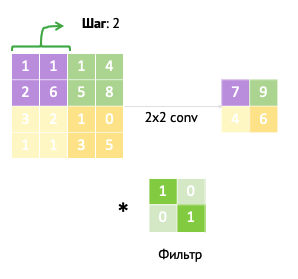
Вспомним хорошее свойство нашего классификатора: после применения свёртки мы брали максимум. Когда мы берём свёртку, мы считаем пространственную корреляцию нашего кусочка изображения с тем шаблоном, который мы хотим на нём найти. Там, где корреляция большая, мы нашли что-то похожее на наш шаблон, а затем мы брали максимум и понимали, что наша чёрточка находится под разным углом.

В нашем свёрточном слое мы нигде не использовали функцию максимума, но нужно обязательно её использовать, чтобы была инвариантность к сдвигу изображения. В этом нам поможет пулинг слой. 

Как работает пулинг слой?  
На входе есть картинка (4 × 4), и есть окно фиксированного размера (2 × 2). Если мы проходим этим окном по картинке с шагом, равным двум, то у окна есть всего четыре возможных положения. Теперь пулинг слой применяет некоторую операцию (мы возьмём максимум). В оранжевом окошке максимум пять, и поэтому на выходе получаем пять, в фиолетовом — шесть и так далее.
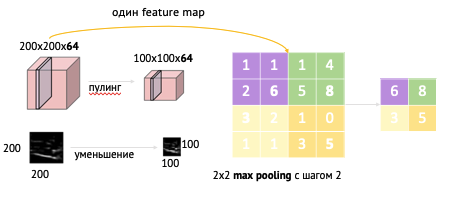
Пулинг слой комбинирует в себе два плюса:

Он применяет максимум, а значит, имеет небольшую инвариантность к сдвигу.
- Пулинг слой обычно применяют с шагом = 2, а это значит, что наша картинка уменьшается в два раза, и поле обзора растёт быстрее.
- Пулинг с максимумом применяется к различным feature map независимо от объёма, который мы получили: он работает на входе и на выходе с плоскими картинками и не меняет количество фильтров.

Пулинг с максимумом теряет детали изображения (на картинке выше показан результат свёртки 200 × 200, к которому применяют пулинг и в итоге получают картинку 100 × 100).

Как считать градиент для пулинга  
Возникает ещё один важный вопрос: как считать градиент для пулинга, если операция максимума не дифференцируема?

Очевидно, что результат макс-пулинга не изменится, если мы немного подвинем входные данные, не являющиеся максимальными. То есть при варьировании этих не максимальных элементов результат макс-пулинга не меняется, а значит, производная по этим элементам равна 0.
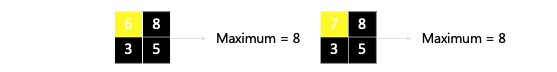
При изменении максимального элемента максимум сразу меняется, и производная по этому элементу равна 1.
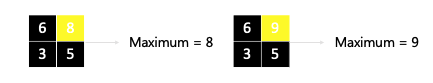
Таким образом мы можем посчитать градиент пулинга.

Подведём итоги  
- Пулинг применяется с бόльшим stride и обеспечивает более быстрое увеличение поля обзора (экспоненциальный рост против линейного).
- Взятие максимума вместо обучаемой свёртки экономит вычисления и добавляет инвариантность к сдвигу.

# 3.9. Практика. Пулинг слой
https://vod-progressive.akamaized.net/exp=1645787320~acl=%2Fvimeo-prod-skyfire-std-us%2F01%2F4088%2F12%2F320443770%2F1242674700.mp4~hmac=ad9d6ce2ff5ac8a1bf53c6e9a9329b6c0b88688fe26515d7fdf8332ede8d371b/vimeo-prod-skyfire-std-us/01/4088/12/320443770/1242674700.mp4

Используемый в видео ноутбук. https://colab.research.google.com/drive/1Wteyx4m3mbwnzkXBFnLRQo7Fwmc_Kl51

Попробуем добавить в нашу сеть пулинг слой. Мы теперь знаем, что он нужен для того, чтобы поле обзора росло быстрее, а также для того, чтобы появлялась небольшая инвариантность к сдвигу. 

Выберем из списка слой MaxPool2D, так как будем делать пулинг по окошкам 2 × 2.
```
model.add(L.Conv2D(filters=32, kernel_size=3, strides=1, padding='same', input_shape=(28, 28, 1)))
model.add(L.MaxPool2D())
model.add(L.Conv2D(filters=64, kernel_size=3, strides=1, padding='same'))
```
Заметим, что слой MaxPool2D в два раза уменьшил размер нашей картинки, количество фильтров не изменилось.

При этом мы использовали 0 параметров.

# 3.10. Первая свёрточная сеть
https://vod-progressive.akamaized.net/exp=1645787430~acl=%2Fvimeo-prod-skyfire-std-us%2F01%2F4153%2F12%2F320765925%2F1244436973.mp4~hmac=225fddd14d8bc10259ef119d162605d5ab747f94d62db0a6670d515d5563e6be/vimeo-prod-skyfire-std-us/01/4153/12/320765925/1244436973.mp4

Соберём это всё в свёрточную сеть  
Теперь мы готовы собрать нашу первую свёрточную сеть. 

Для примера рассмотрим архитектуру LeNet http://yann.lecun.com/exdb/publis/pdf/lecun-98.pdf, придуманную в 1998 году. Она применялась для MNIST — задачи распознавания рукописных цифр.

На вход принималась чёрно-белая картинка размера 32 × 32 × 1. Сначала предлагается применить свёртку с фильтром размером 5 × 5 и обучить шесть таких фильтров, чтобы на выходе получить объём 28 × 28 × 6 (32 превратилось в 28 потому, что мы не использовали padding). Дальше предлагается использовать пулинг слой, чтобы уменьшить картинку в 2 раза, таким образом получив размеры 14 × 14 × 6. 
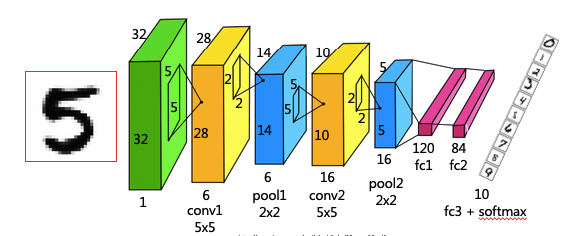
Количество фильтров при этом не поменяется, так как пулинг работает с каждой feature map независимо.

Потом применяем ещё один свёрточный слой с фильтром 5 × 5, чтобы увеличить поле обзора, и получаем размеры 10 × 10 × 16. Фильтров, которые обучаются, становится уже больше. Это делается для того, чтобы не терять информацию. 

Вновь используем пулинг слой, который сделает нашу картинку размером 5 × 5 × 16. Полученный объём предлагается вытянуть в вектор и к этому вектору применить 2 полносвязных слоя, то есть предполагается, что в этом последнем пулинг слое в 16 признаках уже закодирована нужная информация, которая поможет нам воссоздать цифру.

После применения двух полносвязных слоёв нужен выходной слой, на котором будет десять выходов, так как у нас десять цифр, и будет применена функция softmax, которая превратит любые выходы в правильное распределение вероятностей. 

Если взять 60 000 примеров, где у нас есть картинка на входе и для неё известен класс, собрать эту архитектуру и оставить backpropagation на пару минут, то он выучит все веса на всех слоях, которые решают эту задачу практически идеально.

Как работает функция softmax?  
Допустим, мы посчитали десять выходов. Каждый из них заменим на экспоненту в степени этого выхода и пронормируем все полученные экспоненты, чтобы в сумме они давали 1. Так как экспонента неотрицательна, а их сумма равна 1, то получим правильное распределение вероятностей.
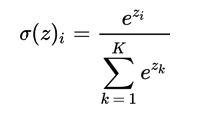
Кросс-энтропия  
Чтобы запустить backpropagation, нужно знать, какую функцию потерь использовать. Для классификации на K классов обычно используют функцию потерь, которую называют кросс-энтропия (cross-entropy).

Для каждого примера мы идём по всем возможным классам и, если пример принадлежит этому классу, то мы в потери записываем логарифм со знаком «минус» от предсказанной вероятности этого класса.
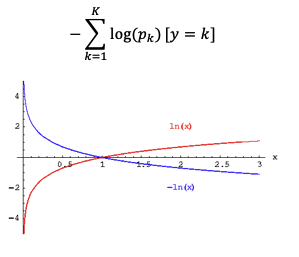
По графику функции -ln(х) видно, что если аргумент этой функции близок к 1, то потери близки к 0, а если аргумент близок к 0, то потери уходят в бесконечность. Это означает, что в потерях на правильном классе хочется видеть вероятность как можно более близкую к 1. Это и будет решать нашу задачу  классификации.

Если обучить нашу нейросеть и посмотреть на каждом слое изображения, на какие кусочки реагируют (имеют большую активацию) наши нейроны, то заметим, что на первом слое нейроны реагируют на простые паттерны на изображении (например, они могут находить перепады яркости под разными углами). Второй свёрточный слой уже может распознавать что-то более сложное (например, кусочек глаза) и так далее. Таким образом нейросеть учит иерархические шаблоны.
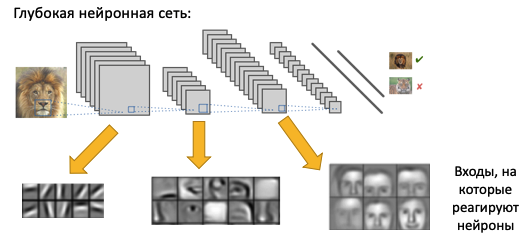

# 3.11. Практика. Первая свёрточная сеть
https://vod-progressive.akamaized.net/exp=1645787576~acl=%2Fvimeo-prod-skyfire-std-us%2F01%2F4088%2F12%2F320443665%2F1242674548.mp4~hmac=b0706d34bc2af9f90a13f7a0dcb6eace98097ac53c7af3ba0b60183d02976c07/vimeo-prod-skyfire-std-us/01/4088/12/320443665/1242674548.mp4

Используемый в видео ноутбук. https://colab.research.google.com/drive/1Wteyx4m3mbwnzkXBFnLRQo7Fwmc_Kl51

Теперь, используя имеющиеся знания, дособерём сеть для решения нашей задачи распознавания одежды по картинке в Fashion MNIST.

Добавим ещё один свёрточный слой и ещё один пулинг-слой, чтобы уменьшить размер картинки:
```
K.clear_session()

model = M.Sequential()
model.add(L.Conv2D(16, kernel_size=3, strides=1, padding='same', input_shape=(28, 28, 1)))
model.add(L.MaxPool2D())
model.add(L.Conv2D(32, kernel_size=3, strides=1, padding='same'))
model.add(L.MaxPool2D())
model.add(L.Conv2D(64, kernel_size=3, strides=1, padding='same'))
model.add(L.MaxPool2D())
```
Теперь, когда картинка стала размера 3 × 3 × 64, вытянем все имеющиеся нейроны в один плоский вектор. Поверх этого плоского вектора мы можем наслоить пару полносвязных слоёв  и решить нашу задачу классификации.

Для того чтобы вытянуть картинку в вектор, добавляем слой Flatten:
```
model.add(L.Flatten()) 
```
На выходе получим:      flatten_1 (Flatten) (None, 576) 0

576 — это ровно та размерность, которая у нас была: 3 × 3 × 64 = 576.

Теперь нам понятно, как работать с этим вектором. К нему можно применить полносвязные слои и получить новый ветор на выходе. Применим плотный слой, у которого будет десять выходов (так как у нас десять классов) с функцией активации softmax, поскольку она даёт распределение вероятностей.
```
model.add(L.Dense(10, activation='softmax'))
```
На выходе получим сеть с 30 000 параметров, а 576 нейронов превратились в десять.

Мы готовы к обучению. Но, чтобы получить больше параметров, добавим ещё один плотный слой перед крайним:
```
model.add(L.Dense(64, activation='elu'))
```
Получим 60 874 параметров, что нас как раз устраивает.

Будем компилировать модель, минимизируя кросс-энтропию и используя оптимайзер Adam:
```
model.compile(
    loss='categorical_crossentropy',  # минимизируем кросс-энтропию
    optimizer='adam',  # так будет быстрее, позже узнаем что это :)
    metrics=['accuracy']  # выводим процент правильных ответов
)
```
Далее нормируем и центрируем картинку (так сети будет проще учиться) и делаем fit, задав фиктивную размерность:
```
 x_train_float[:, :, :, np.newaxis]
```
Заметим, что обучение идёт очень медленно, потому что мы считаем на центральном процессоре. Запустим наш процесс на GPU, сменив runtime type. После этого нас перекинут в новый контейнер, в котором есть видеокарта. Запустим все ячейки заново.

Заметим, что здесь уже на второй эпохе мы получаем качество 0,89, в то время как с полносвязными слоями получали 0,87. Наши свёрточные слои решают задачи с картинками лучше, что неудивительно.

Таким образом, мы собрали нашу первую свёрточную сеть.

# Видео № 2
https://vod-progressive.akamaized.net/exp=1645787576~acl=%2Fvimeo-prod-skyfire-std-us%2F01%2F4088%2F12%2F320443524%2F1242674052.mp4~hmac=fd6f9a4a99a117a166e8900bf3383689473e5cadeab7ce4c3dd565d1d1f10514/vimeo-prod-skyfire-std-us/01/4088/12/320443524/1242674052.mp4

В этом видео мы рассмотрим демонстрацию применения LeNet.

# 3.12. Современные архитектуры
https://vod-progressive.akamaized.net/exp=1645787755~acl=%2Fvimeo-prod-skyfire-std-us%2F01%2F4153%2F12%2F320768982%2F1244452584.mp4~hmac=045e528553e8416bfc15fc0213debb5a0309a7fb6a9370f4e59c240f5fd7cd8f/vimeo-prod-skyfire-std-us/01/4153/12/320768982/1244452584.mp4

Посмотрим, как устроены современные архитектуры свёрточных сетей.

Вспомним про задачу ImageNet. Люди за много лет насобирали более миллиона изображений, которые размечены на 1 000 классов. Классы довольно сложные (например, разные породы собак и кошек). Для неподготовленного человека разделить эти изображения на классы достаточно сложно.

В 2012 году решению этой задачи обучили огромную нейросеть AlexNet.

Устроена она была так: у нас есть несколько свёрточных слоев с макс-пулингом между ними, и мы используем свёртки 11 × 11, 5 × 5, 3 × 3.

Дополнительно использовался dropout, аугментация данных и ReLu (специальная функция активации). Про них узнаем в следующем модуле, а сейчас посмотрим вот на что: в этой сети было 60 миллионов параметров, и это была беспрецедентная сеть на тот момент.

Про аугментацию данных — один из трюков нейросети AlexNet — можем поговорить уже сейчас.

В нейросети было 60 миллионов параметров, которые нужно оценить по миллиону изображений. На самом деле картинок слишком мало, чтобы оценить столько параметров. Попробуем слегка видоизменить картинки (повернуть, отразить, растянуть, поменять резкость) и тогда наши данные для обучения увеличатся. Все эти манипуляции с картинками и называются аугментацией данных.

Стоит отметить, что добавлять сдвиги при аугментации данных бесполезно.

Можно было бы предположить, что сдвиги помогут нам научиться искать котов на разных положениях на картинке, но нам это не нужно, если у нас есть макс-пулинг слой, ведь достаточно просто сделать архитектуру таким образом, чтобы где-то близко к выходному слою мы взяли максимум.

Другой пример архитектуры — VGG, предложенная в 2015 году (спустя 3 года после AlexNet). Видеокарты к тому времени стали мощнее, и новая сеть содержала 138 миллионов параметров. Здесь уже не использовали дорогие и тяжёлые свёртки размера 11 × 11, а обошлись большим числом свёрток размером 3 × 3. В остальном по принципу нейросеть очень похожа на AlexNet.

# 3.13. Inception V3
https://vod-progressive.akamaized.net/exp=1645787805~acl=%2Fvimeo-prod-skyfire-std-us%2F01%2F4049%2F12%2F320248794%2F1241728346.mp4~hmac=a0cc730df6602a1e6d74f4ec3171d949097481e988970de3f5645f16cddfc772/vimeo-prod-skyfire-std-us/01/4049/12/320248794/1241728346.mp4

Теперь познакомимся с архитектурой Inception V3, предложенной также в 2015 году и отличающейся от AlexNet. В этой сети значительно меньше параметров (всего 25 миллионов). Эта сеть состоит из оригинальных inception-блоков (их рассмотрим чуть позже) и дополнительных трюков, таких как батч-нормализация, аугментация и RMSProp (алгоритм оптимизации).

Как устроен inception-блок?
Первое, с чем нам нужно познакомиться, — свёртка 1 × 1.
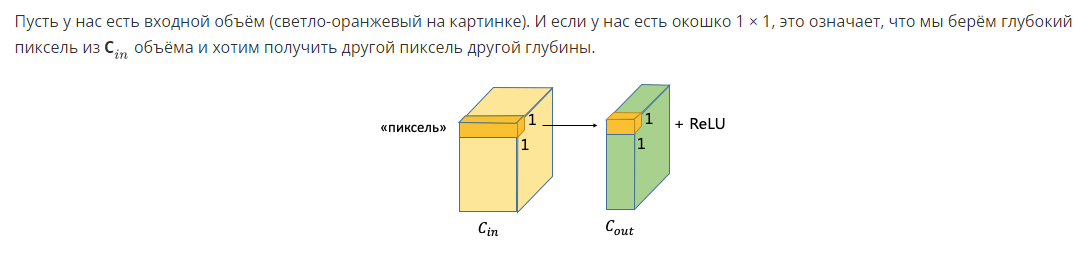
То есть мы будем искать новые пиксели как линейные комбинации входных. Такое линейное преобразование очень похоже на уменьшение размерности.

Объясняя простым языком, мы даём нейросети возможность обучать много фильтров, а затем похожие фильтры схлопываются в один линейным преобразованием.
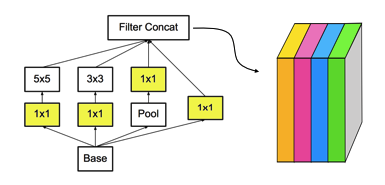
Как устроен inception-блок внутри?
На входе нам поступает некоторый объём, и к нему применяют четыре ветки вычисления:
- Первая ветка применяет свёртку 1 × 1, чтобы уменьшить глубину этого объёма. Дальше применяется свёртка 5 × 5 с таким padding, чтобы на выходе высота и ширина изображения остались неизменными.
- На второй ветке применяем свёртку 1 × 1, а затем 3 × 3.
- На третьей ветке применяем пулинг с шагом 1, а затем свёртку 1 × 1.
- Четвёртая ветка просто делает свёртку 1 × 1.

Отметим, что можно так подобрать padding и stride, что измерения W и H выходных объёмов всех веток будут одинаковыми, а глубина будет различаться. Это означает, что их можно будет склеить по глубине. В итоге получим один большой объём.

Можно заменить свёртки 5 × 5 двумя свёртками 3 × 3:
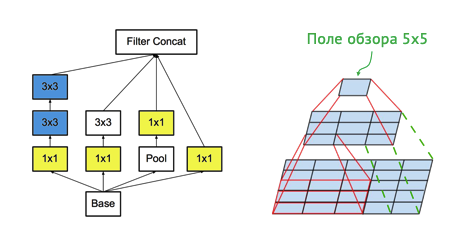
Количество параметров, необходимых для такой операции, станет меньше.

Сепарабельные фильтры
Существует фильтр размытия по Гауссу — гауссиан, то есть мы возьмём кусочек изображения, взвесим все пиксели с весами, которые даёт нам гауссиан, и получим размытие по Гауссу. Это размытие можно «дёшево» сделать одномерными свёртками. 

Например, пусть у нас есть синий пиксель. Сначала сделаем размытие одномерным гауссовским ядром по горизонтали:
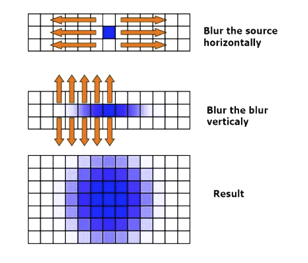
К этому результату можно применить свёртку по вертикали, и мы получим такой же результат, как если бы мы применяли двумерную свёртку к нашему пикселю. Если посчитать количество операций при размытии по горизонтали, а затем по вертикали, то количество операций окажется в разы меньше.

Такие фильтры, которые позволяют заменить себя на последовательность одномерных, называются сепарабельными.

Дадим нейросети возможность учить такие фильтры, заменим в нашем inception-блоке свёртки 3 × 3 на сепарабельные свёртки 1 × 3 и 3 × 1.
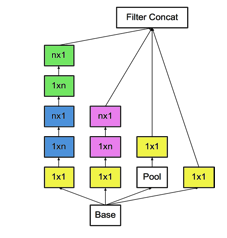
Таким образом, мы придумали очень эффективный inception-блок, который использует мало параметров и даёт лучшее качество, чем набор свёрток 3 × 3.

# 3.14. Домашнее задание
В домашнем задании вам предстоит обучить свёрточную нейронную сеть распознавать изображения из датасета CIFAR-10. 

Notebook с инструкциями по решению задачи. https://colab.research.google.com/drive/1Hs7xYVkjOO7s_b8_ozK9VVCKwelVe27O

Чтобы завершить домашнюю работу, введите свои ответы на вопросы в поля ниже. 

А также мы подготовили для вас Kaggle-соревнование по распознаванию CAPTCHA, пройдите по ссылке здесь. https://www.kaggle.com/c/sf-captcha-recognition/

Желаем удачи!

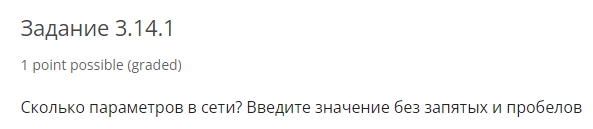

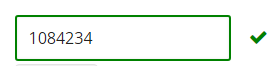

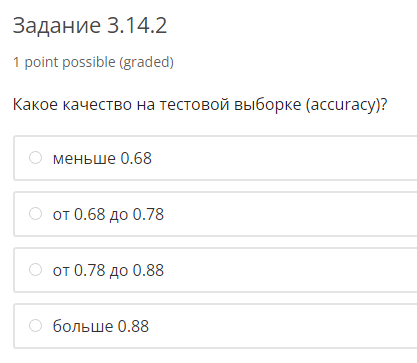

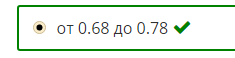

# Дополнительные материалы	
Дополнительно мы предлагаем вам ознакомиться с интересными материалами, которые вы можете сохранить себе и изучить в удобное время.
- Convolutional Networks http://cs231n.github.io/convolutional-networks/
- How do Convolutional Neural Networks work? https://brohrer.github.io/how_convolutional_neural_networks_work.html
- How convolutional neural networks see the world? https://blog.keras.io/how-convolutional-neural-networks-see-the-world.html